## Task 1. Bifurcation map
$x_{n+1}\leftarrow rx_n(1-x_n)$\
$x_0\leftarrow \text{rand}(0,1)$\
$r\leftarrow\text{const}$

In [ ]:
!pip install mpi4py

Note: you may need to restart the kernel to use updated packages.


In [1]:
from mpi4py import MPI
import time

In [2]:
%%writefile parallel_bifurcation.py

from mpi4py import MPI
import numpy as np
import sys

n_r = int(sys.argv[1])
n_iter = int(sys.argv[2])

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

R_total = np.linspace(0,4,n_r)
R = np.array_split(R_total, size)[rank]


X = np.random.rand(len(R))
for i in range(n_iter): X=(R*X)*(1-X)

X_total_temp = comm.gather(X, root = 0)
if rank == 0:
    X_total = np.concatenate(X_total_temp)

Writing parallel_bifurcation.py


In [3]:
T = []
for i in range(1,11):
    t_start = time.time()
    !mpiexec -n {i} python parallel_bifurcation.py 500000 1000
    t_end = time.time()
    T.append(t_end-t_start)
    print('Time: {:6.3f}     Processes: {}'.format(T[-1],i))

Time:  5.881     Processes: 1
Time:  4.130     Processes: 2
Time:  4.219     Processes: 3
Time:  4.360     Processes: 4
Time:  4.504     Processes: 5
Time:  4.690     Processes: 6
Time:  4.812     Processes: 7
Time:  5.169     Processes: 8
Time:  5.141     Processes: 9
Time:  5.182     Processes: 10


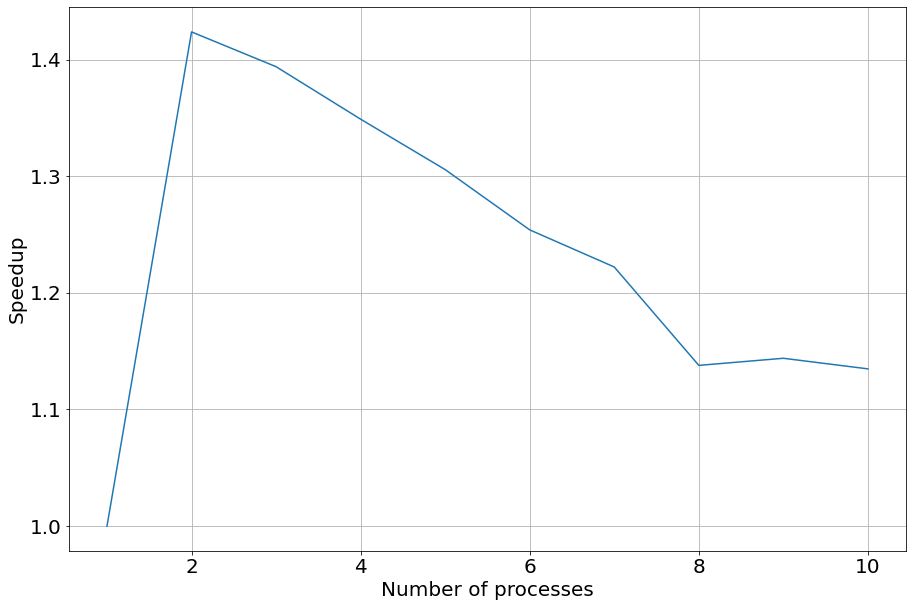

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.plot(range(1,11), [T[0]/i for i in T])
plt.xlabel('Number of processes', fontsize=20)
plt.ylabel('Speedup', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid();